In [5]:
# imports
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

In [24]:
folder_of_tiffs = '/Users/emilydennis/Desktop/spimout/'
list_of_tiffs = [file for file in os.listdir(folder_of_tiffs) if file[-4:]=='.tif']

In [42]:
max_indices = []
max_in_atl = []
max_in_reg = []
for file in list_of_tiffs:
    tiff_file = tif.imread(os.path.join(folder_of_tiffs,file))
    index_tuple = np.unravel_index(np.argmax(tiff_file),tiff_file.shape)
    max_indices.append([file,index_tuple])
    if 'atl' in file:
        max_in_atl.append([file,index_tuple])
    else:
        max_in_reg.append([file,index_tuple])

In [39]:
pd.DataFrame(max_indices,columns=['file_name','indices']).to_csv('/Users/emilydennis/Desktop/cm2_max_indices.csv')

In [82]:
max_in_atl_df = pd.DataFrame(max_in_atl,columns=["name","tuple"])
max_in_reg_df = pd.DataFrame(max_in_reg,columns=["name","tuple"])

In [83]:
max_in_reg_df

,name,tuple
0,h234_cell_to_reg.tif,"(141, 627, 393)"
1,a253_cell_to_reg.tif,"(148, 629, 333)"
2,e144_cell_to_reg.tif,"(18, 694, 342)"
3,e143_cell_to_reg.tif,"(40, 565, 400)"
4,j319_cell_to_reg.tif,"(130, 732, 372)"
5,j316_cell_to_reg.tif,"(126, 707, 335)"
6,e142_cell_to_reg.tif,"(133, 694, 355)"
7,j317_cell_to_reg.tif,"(106, 762, 331)"
8,e153_cell_to_reg.tif,"(133, 664, 329)"


In [84]:
xs=[]
ys=[]
for locale in max_in_reg_df.tuple:
    xs.append(locale[1])
    ys.append(locale[0])

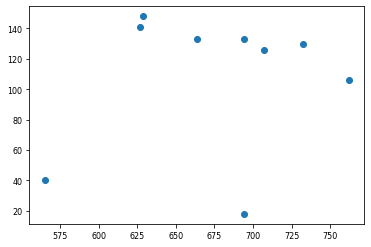

In [85]:
plt.scatter(xs,ys)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7fcd68229b38>)

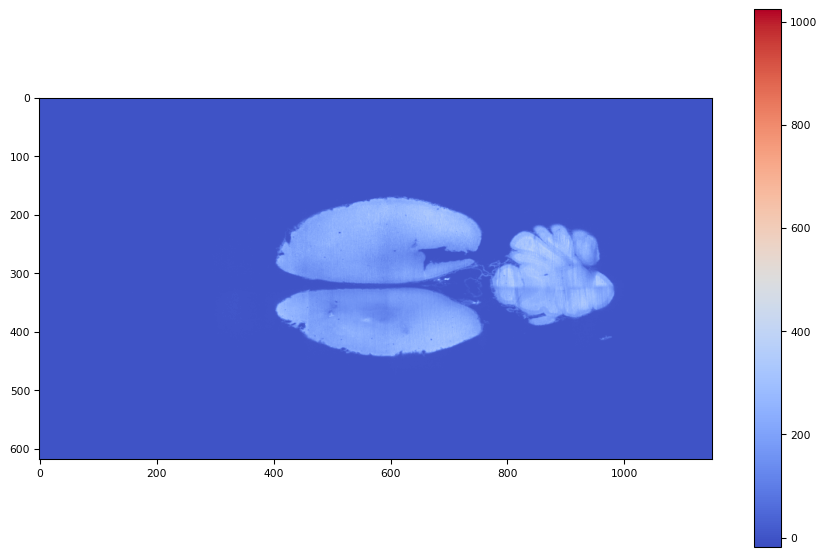

In [81]:
tif.imshow(tif.imread(os.path.join(folder_of_tiffs,'j316_reg_in_atl.tif'))[:,:,40])